<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/12%EC%A3%BC%EC%B0%A8__%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 문제 1

### 1.1 PCA의 장점 2가지와 이유를 설명하세요.

In [ ]:
# 1. 답안 보고 판단
# 차원의 저주 문제를 해결할 수 있다.
# 선택된 변수로 시각화 용이

## 문제 2  

### [ 신용카드 이용 내역 ]

* `LIMIT_BAL` : 주어진 신용 금액    
  
  
* `PAY_1`~ `PAY6` : 2005년 4월부터 9월까지의 상환 현황  
(ex: __PAY_1__ : 2005년 9월 상환 현황, __PAY_2__ : 2005년 8월 상환 현황)  
(__-1__ : 상환 완료, __0__ : 해당사항 없음, __1__ : 1개월 지연 , __2__ : 2개월 지연 ... __9__ : 9개월 이상 지연)  
  

* `BILL_AMT1` ~ `BILL_AMT6`: 2005년 4월부터 9월까지의 어음계산서 금액  
(ex: __BILL_AMT1__ : 2005년 9월 청구서 금액 , __BILL_AMT2__ : 2005년 8월 청구서 금액)  
  
  
* `PAY_AMT1` ~ `PAY_AMT6` : 2005년 4월부터 9월까지의 이전 결제 금액  
(ex: __PAY_AMT1__ : 2005년 9월에 지급된 금액 , __PAY_AMT2__ : 2005년 8월에 지급된 금액)  

In [1]:
import pandas as pd

In [10]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/비타민/12주/12주차_복습과제/credit_card.xls', header = 1, sheet_name = 'Data').iloc[:,1:]

df.rename(columns = {'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace = True)
y_target = df['default']
X_features = df.drop('default', axis = 1)

X_features.shape, y_target.shape

((30000, 23), (30000,))

In [11]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

### 2-1 X_features에 대한 상관관계를 보여주세요

In [12]:
## Use heatmap, fmt='.1g'

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

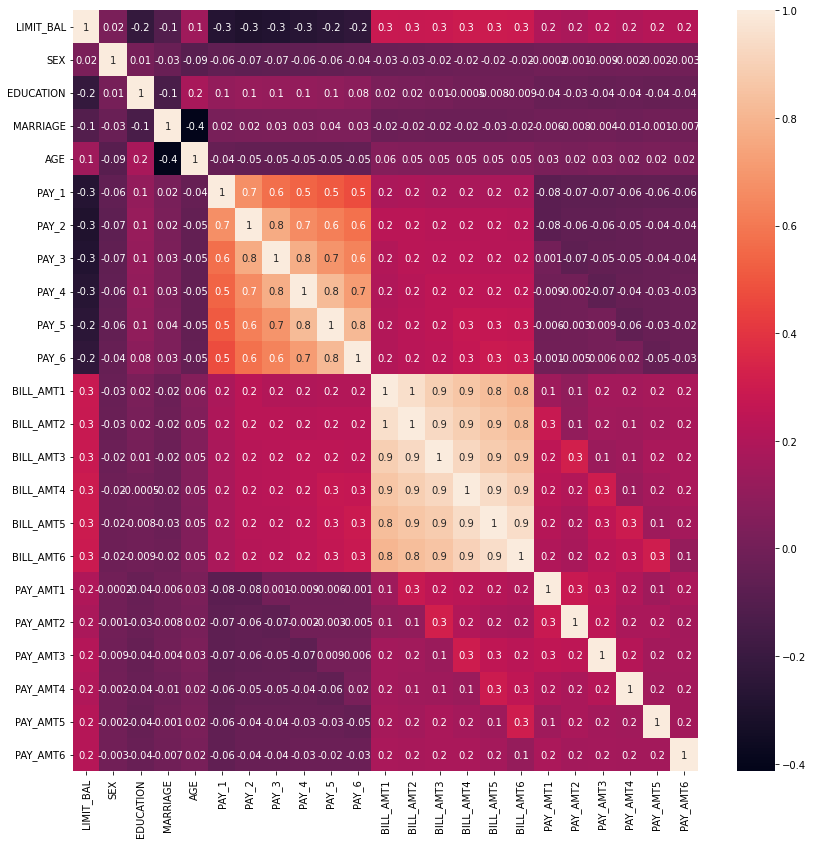

In [13]:
# code here

corr = X_features.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot = True, fmt = '.1g')

### 2.2 위의 결과를 보고 PCA를 해야한다면, 어떤 Feature를 적용할 것인지 선택해 설명해주세요. (1개 선택)
  
1. `PAY_1`~ `PAY6`  
  
2. `BILL_AMT1` ~ `BILL_AMT6`  
  
3. `PAY_AMT1` ~ `PAY_AMT6`

In [ ]:
# 번호 : 2번

# 이유 : 상관계수가 가장 크기 때문

### 2.3 선택한 피쳐를 2개의 속성을 가진 PCA 객체로 생성하고 개별 컴포넌트의 변동성을 확인하세요.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
# 코드를 이해하고 본인이 선택한 번호의 피쳐 넣어주세요!
cols_pca = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명 :', cols_pca)

대상 속성명 : ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [16]:
## 2개의 PCA 속성을 가진 PCA 객체를 생성하고 변동성 확인 (StandardScaling 사용)
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_pca])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)

# code here

print('PCA Component별 변동성: ', pca.explained_variance_ratio_ )

PCA Component별 변동성:  [0.90555253 0.0509867 ]


### 2.4 PCA를 적용한 결과를 바탕으로 해당 데이터에서 PCA의 효과에 대해 설명하세요.

In [17]:
# 

***

### [ 원본 데이터 VS PCA 적용 데이터 ]

### 2.5 전체 X_feature에 대한 교차검증을 진행하세요. (RandomForest , Accuracy)

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [21]:
## RandomForest 객체 생성 (n_estimators = 300, random_state = 156)
## cv = 3
rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf, X_features, y_target, scoring = 'accuracy', cv = 3)

# code here
print('CV = 3인 경우의 개별 Fold 세트별 정확도 :', scores)
print('평균 정확도 {0:.4f}'.format(np.mean(scores)))

CV = 3인 경우의 개별 Fold 세트별 정확도 : [0.8083 0.8196 0.8232]
평균 정확도 0.8170


### 2.6 PCA를 적용한 후, 주어진 시각화 코드를 출력해 본인이 생각하는 적절한 컴포넌트 값을 찾으세요.

In [41]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
pca = PCA(n_components = 9, random_state = 0)
df_pca = pca.fit_transform(df_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


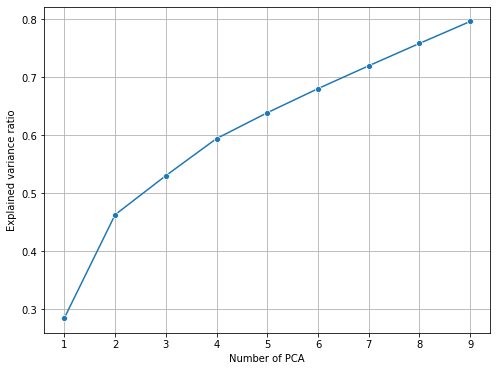

In [42]:
fig ,ax = plt.subplots(1,1, figsize = (8, 6))
sns.lineplot(np.arange(1,df_pca.shape[1]+1),np.cumsum(pca.explained_variance_ratio_), marker = 'o', ax=ax )
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
# 컴포넌트 값 : 9개

# 이유 : 누적 기여율 값이 0.8이상이 되므로

### 2.7 위에서 결정한 컴포넌트값을 적용하여 교차검증을 진행하세요. (RandomForest , Accuracy, 위와 동일)

In [44]:
# 원본 데이터 셋에 StandardScaler 적용
# 컴포넌트 적용한 PCA 변환 후 교차검증 진행

scores_pca = cross_val_score(rcf, df_pca, y_target, scoring = 'accuracy', cv = 3)
print('CV = 3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV = 3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7945 0.8012 0.8033]
PCA 변환 데이터 세트 평균 정확도:0.7997


### 2.8 본인이 선택한 컴포넌트 값이 PCA를 적용하여도 데이터를 잘 설명하고 있는지 설명하세요.

In [ ]:
# 큰 정보 손실 없이 데이터를 잘 설명하고 있다.

# 문제 3

### 3.1. LDA 와 QDA의 공통점과 차이점을 서술하시오.

* 공통점: 둘다 베이즈 정리를 이용하여 분류를 수행한다.
* 차이점: 
** LDA : class별로 공분산 구조가 같음을 가정.
** QDA : class별로 공분산 구조가 다름을 가정

In [45]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import seaborn as sns

In [70]:
### 데이터 셋 불러오기
import pandas as pd
#import opendatasets as od
df = pd.read_csv('/content/drive/MyDrive/비타민/12주/12주차_복습과제/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [71]:
df = df[df['Type 2'].isnull()].loc[:, ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP', 'Type 1']]
X = df.iloc[:, :-1]

from sklearn.preprocessing import normalize
X_norm = normalize(X)

y = df.iloc[:, -1].values

In [72]:
df.head()

,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP,Type 1
4,52,43,60,50,65,39,Fire
5,64,58,80,65,80,58,Fire
9,48,65,50,64,43,44,Water
10,63,80,65,80,58,59,Water
11,83,100,85,105,78,79,Water


### 3.2. 새로운 데이터셋으로, 변수들 관 상관관계를 파악해주세요. (heatmap 사용)

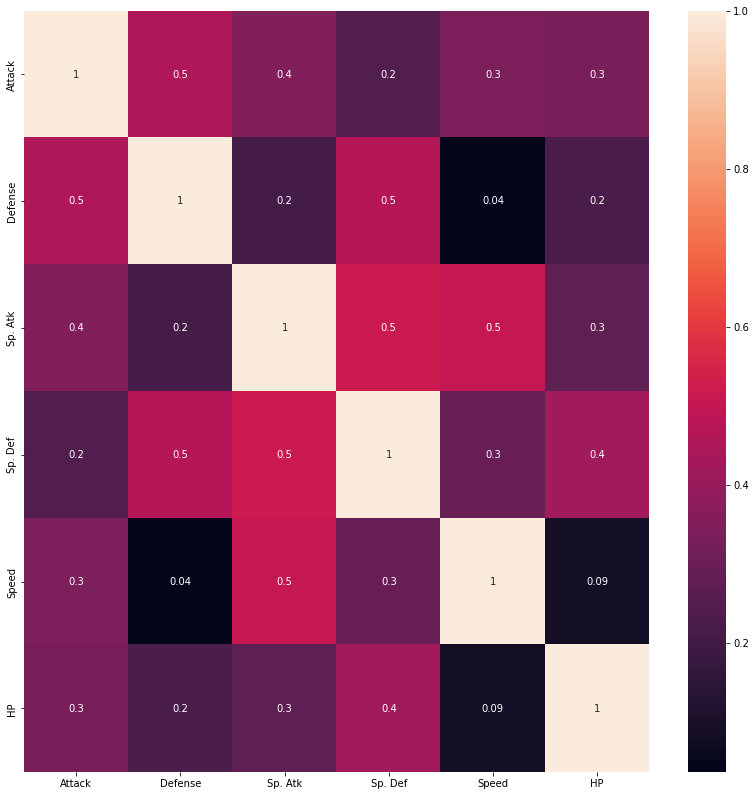

In [77]:
#write code here
corr = X.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot = True, fmt = '.1g')

### 3.3. Feature/Target을 지정 후, Train/Test 데이터를 나눕니다. (test size = .2, random_state = 50)

In [78]:
import seaborn as sns
from sklearn.model_selection import train_test_split
#write code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 50)

### 3.4. LDA를 적용한 후, 평가 과정을 거쳐 정확도를 구해주세요.

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# code here (n_compenents = 3)
lda = LinearDiscriminantAnalysis(n_components = 3)
model_lda = lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

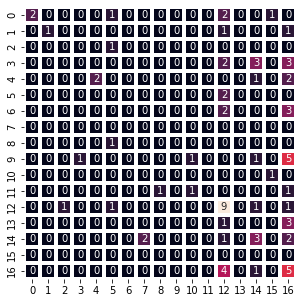

In [83]:
cm = confusion_matrix(y_test, y_pred_lda)
ax = plt.subplots(figsize = (5, 5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar = False, square = True, annot = True, fmt = 'g',
               linewidths = 2.5)    

In [84]:
round(accuracy_score(y_test,y_pred_lda), 4)

0.2821

In [87]:
print(classification_report(y_test,y_pred_lda))

              precision    recall  f1-score   support

         Bug       1.00      0.33      0.50         6
        Dark       1.00      0.33      0.50         3
      Dragon       0.00      0.00      0.00         1
    Electric       0.00      0.00      0.00         8
       Fairy       1.00      0.40      0.57         5
    Fighting       0.00      0.00      0.00         2
        Fire       0.00      0.00      0.00         5
      Flying       0.00      0.00      0.00         0
       Ghost       0.00      0.00      0.00         1
       Grass       0.00      0.00      0.00         8
      Ground       0.00      0.00      0.00         1
         Ice       0.00      0.00      0.00         3
      Normal       0.38      0.69      0.49        13
      Poison       0.00      0.00      0.00         4
     Psychic       0.30      0.38      0.33         8
        Rock       0.00      0.00      0.00         0
       Water       0.19      0.50      0.28        10

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

### 3.6  QDA를 적용한 후, 평가 과정을 거쳐 정확도를 구해주세요.

In [88]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


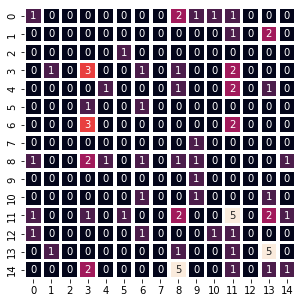

In [89]:
cm = confusion_matrix(y_test,y_pred_qda)
ax = plt.subplots(figsize = (5, 5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar = False, square = True, annot = True, fmt = 'g',
               linewidths = 2.5)
                   

In [90]:
round(accuracy_score(y_test,y_pred_qda), 4)

0.2308

In [91]:
print(classification_report(y_test,y_pred_qda))

              precision    recall  f1-score   support

         Bug       0.25      0.17      0.20         6
        Dark       0.00      0.00      0.00         3
      Dragon       0.00      0.00      0.00         1
    Electric       0.25      0.38      0.30         8
       Fairy       0.50      0.20      0.29         5
    Fighting       0.00      0.00      0.00         2
        Fire       0.00      0.00      0.00         5
       Ghost       0.00      0.00      0.00         1
       Grass       0.08      0.12      0.10         8
      Ground       0.20      1.00      0.33         1
         Ice       0.00      0.00      0.00         3
      Normal       0.31      0.38      0.34        13
      Poison       0.00      0.00      0.00         4
     Psychic       0.42      0.62      0.50         8
       Water       0.33      0.10      0.15        10

    accuracy                           0.23        78
   macro avg       0.16      0.20      0.15        78
weighted avg       0.22   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.7 LDA와 QDA 중 어떤 방법이 더 정확도가 높나요? 방법을 골라주시고, 데이터셋의 특징을 사용하여 그 이유도 같이 서술해주세요.

* LDA가 더 높다.
* 이유: 데이터셋을 봤을 때 class별 공분산 구조가 큰 차이를 보이지 않으므로 LDA를 쓸 때 정확도가 더 높다.